In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# load and display
bd1_data_path = "Resources/Realtor_1BD.csv"
bd2_data_path = "Resources/Realtor_2BD.csv"
bd3_data_path = "Resources/Realtor_3BD.csv"
bd4_data_path = "Resources/Realtor_4BD.csv"
bd5_data_path = "Resources/Realtor_5BD.csv"

austin_bnb_path = "Resources/aus_listings.csv"
boston_bnb_path = "Resources/bos_listings.csv"
chicago_bnb_path = "Resources/chi_listings.csv"
sandiego_bnb_path = "Resources/sd_listings.csv"
seattle_bnb_path = "Resources/sea_listings.csv"

bd1_df = pd.read_csv(bd1_data_path)
bd2_df = pd.read_csv(bd2_data_path)
bd3_df = pd.read_csv(bd3_data_path)
bd4_df = pd.read_csv(bd4_data_path)
bd5_df = pd.read_csv(bd5_data_path)

aus_bnb_df = pd.read_csv(austin_bnb_path)
bos_bnb_df = pd.read_csv(boston_bnb_path)
chi_bnb_df = pd.read_csv(chicago_bnb_path)
sd_bnb_df = pd.read_csv(sandiego_bnb_path)
sea_bnb_df = pd.read_csv(seattle_bnb_path)

aus_bnb_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20181112235459,2018-11-13,Zen-East in the Heart of Austin,Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,...,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,0.20
1,5245,https://www.airbnb.com/rooms/5245,20181112235459,2018-11-13,"Green, Colorful, Clean & Cozy home",NaN,Situated in a vibrant & diverse multicultural ...,Situated in a vibrant & diverse multicultural ...,none,NaN,...,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,0.08
2,5456,https://www.airbnb.com/rooms/5456,20181112235459,2018-11-13,"Walk to 6th, Rainey St and Convention Ctr",Fabulous location for walking to Convention Ce...,Cute Private Studio apartment located in Willo...,Fabulous location for walking to Convention Ce...,none,My neighborhood is ideally located if you want...,...,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,t,1,3.91
3,5769,https://www.airbnb.com/rooms/5769,20181112235459,2018-11-13,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,none,Quiet neighborhood with lots of trees and good...,...,f,NaN,"{""Texas State""}",f,f,moderate,t,t,1,2.27
4,6413,https://www.airbnb.com/rooms/6413,20181112235459,2018-11-13,Gem of a Studio near Downtown,"Great studio apartment, perfect for couples or...","(License #114332) Large, contemporary studio a...","Great studio apartment, perfect for couples or...",none,Travis Heights is one of the oldest neighborho...,...,f,32041657928,"{""Texas State""}",t,f,strict_14_with_grace_period,f,f,1,0.73


In [2]:
bd1_df.head()

,Month,CBSACode,CBSATitle,Country,PropertyType,NoOfBdrs,MedianListingPrice,MedianListingPrice M/M,MedianListingPrice Y/Y,MedianListingSqft,...,TotalListingCount Y/Y,PendingRatio,PendingRatio M/M,PendingRatio Y/Y,Views M/M,Views Y/Y,ViewsPerProperty M/M,ViewsPerProperty Y/Y,QualityFlagPending,QualityFlagSqft
0,201811,36540.0,"Omaha-Council Bluffs, NE-IA",USA,Condo/Townhome/Row Home/Co-Op,bdrs_1,193725.0,-0.1651,0.6590,930.0,...,-0.0328,0.0000,0.0000,-0.4524,-0.3377,-0.0208,-0.2385,-0.3083,1.0,0.0
1,201811,10140.0,"Aberdeen, WA",USA,Condo/Townhome/Row Home/Co-Op,bdrs_1,81550.0,0.0316,-0.1638,612.0,...,-0.0222,0.0732,0.0219,-0.0244,-0.2160,0.1861,-0.2353,0.2264,0.0,0.0
2,201811,26420.0,"Houston-The Woodlands-Sugar Land, TX",USA,Condo/Townhome/Row Home/Co-Op,bdrs_1,146675.0,-0.0215,0.0481,793.0,...,0.0338,0.2307,-0.0041,-0.0729,-0.0900,0.0412,-0.0769,-0.0588,0.0,0.0
3,201811,34740.0,"Muskegon, MI",USA,Condo/Townhome/Row Home/Co-Op,bdrs_1,129950.0,-0.0371,0.0048,791.0,...,3.5000,0.0000,0.0000,0.0000,-0.3629,2.9752,-0.4157,-0.1333,0.0,0.0
4,201811,23860.0,"Georgetown, SC",USA,Condo/Townhome/Row Home/Co-Op,bdrs_1,153784.5,0.0605,-0.1088,501.0,...,-0.3429,0.0000,0.0000,0.0000,0.6983,-0.3091,0.5000,0.1250,0.0,0.0


In [3]:
# Cut the infomation we need down, drop the useless one
bd1_df = bd1_df[bd1_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd1_df = bd1_df[bd1_df["CBSATitle"].str.contains("MN") == False]
bd1_df = bd1_df[bd1_df["PropertyType"] == "Total"]
bd1_df = bd1_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd1_df = bd1_df.sort_values(by = ["CBSATitle"])

bd2_df = bd2_df[bd2_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd2_df = bd2_df[bd2_df["CBSATitle"].str.contains("MN") == False]
bd2_df = bd2_df[bd2_df["PropertyType"] == "Total"]
bd2_df = bd2_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd2_df = bd2_df.sort_values(by = ["CBSATitle"])

bd3_df = bd3_df[bd3_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd3_df = bd3_df[bd3_df["CBSATitle"].str.contains("MN") == False]
bd3_df = bd3_df[bd3_df["PropertyType"] == "Total"]
bd3_df = bd3_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd3_df = bd3_df.sort_values(by = ["CBSATitle"])

bd4_df = bd4_df[bd4_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd4_df = bd4_df[bd4_df["CBSATitle"].str.contains("MN") == False]
bd4_df = bd4_df[bd4_df["PropertyType"] == "Total"]
bd4_df = bd4_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd4_df = bd4_df.sort_values(by = ["CBSATitle"])

bd5_df = bd5_df[bd5_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd5_df = bd5_df[bd5_df["CBSATitle"].str.contains("MN") == False]
bd5_df = bd5_df[bd5_df["PropertyType"] == "Total"]
bd5_df = bd5_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd5_df = bd5_df.sort_values(by = ["CBSATitle"])

bd1_df.head()

,CBSATitle,PropertyType,MedianListingPrice
1744,"Austin-Round Rock, TX",Total,305050.0
1646,"Boston-Cambridge-Newton, MA-NH",Total,357450.0
1447,"Chicago-Naperville-Elgin, IL-IN-WI",Total,179550.0
1791,"San Diego-Carlsbad, CA",Total,358675.0
1361,"Seattle-Tacoma-Bellevue, WA",Total,405787.5


In [4]:
# Cut the infomation we need down, drop the useless one
aus_bnb_df = aus_bnb_df[["room_type","bedrooms","price"]]
aus_bnb_df = aus_bnb_df.dropna()
aus_bnb_df = aus_bnb_df[aus_bnb_df["room_type"] == "Entire home/apt"]
aus_bnb_df["price"] = aus_bnb_df["price"].str.replace(",","")
aus_bnb_df["price"] = aus_bnb_df["price"].str.replace("$","")
aus_bnb_df["price"] = aus_bnb_df["price"].astype(float)

bos_bnb_df = bos_bnb_df[["room_type","bedrooms","price"]]
bos_bnb_df = bos_bnb_df.dropna()
bos_bnb_df = bos_bnb_df[bos_bnb_df["room_type"] == "Entire home/apt"]
bos_bnb_df["price"] = bos_bnb_df["price"].str.replace(",","")
bos_bnb_df["price"] = bos_bnb_df["price"].str.replace("$","")
bos_bnb_df["price"] = bos_bnb_df["price"].astype(float)

chi_bnb_df = chi_bnb_df[["room_type","bedrooms","price"]]
chi_bnb_df = chi_bnb_df.dropna()
chi_bnb_df = chi_bnb_df[chi_bnb_df["room_type"] == "Entire home/apt"]
chi_bnb_df["price"] = chi_bnb_df["price"].str.replace(",","")
chi_bnb_df["price"] = chi_bnb_df["price"].str.replace("$","")
chi_bnb_df["price"] = chi_bnb_df["price"].astype(float)

sd_bnb_df = sd_bnb_df[["room_type","bedrooms","price"]]
sd_bnb_df = sd_bnb_df.dropna()
sd_bnb_df = sd_bnb_df[sd_bnb_df["room_type"] == "Entire home/apt"]
sd_bnb_df["price"] = sd_bnb_df["price"].str.replace(",","")
sd_bnb_df["price"] = sd_bnb_df["price"].str.replace("$","")
sd_bnb_df["price"] = sd_bnb_df["price"].astype(float)

sea_bnb_df = sea_bnb_df[["room_type","bedrooms","price"]]
sea_bnb_df = sea_bnb_df.dropna()
sea_bnb_df = sea_bnb_df[sea_bnb_df["room_type"] == "Entire home/apt"]
sea_bnb_df["price"] = sea_bnb_df["price"].str.replace(",","")
sea_bnb_df["price"] = sea_bnb_df["price"].str.replace("$","")
sea_bnb_df["price"] = sea_bnb_df["price"].astype(float)

bos_bnb_df.head()

,room_type,bedrooms,price
0,Entire home/apt,1.0,125.0
1,Entire home/apt,1.0,145.0
2,Entire home/apt,1.0,169.0
4,Entire home/apt,1.0,99.0
5,Entire home/apt,1.0,154.0


In [5]:
# Grab the average estimate occupancy from the website below
# http://insideairbnb.com/get-the-data.html for each city
# estimate set of guests per year
aus_occ = 0.221 * 365
bos_occ = 0.297 * 365
chi_occ = 0.382 * 365
sd_occ = 0.278 * 365
sea_occ = 0.344 *365

In [6]:
# estimate possibel profit with 1 bed room airbnb for each city

aus_bnb_bd1 = aus_bnb_df[aus_bnb_df["bedrooms"] == 1]
bos_bnb_bd1 = bos_bnb_df[bos_bnb_df["bedrooms"] == 1]
chi_bnb_bd1 = chi_bnb_df[chi_bnb_df["bedrooms"] == 1]
sd_bnb_bd1 = sd_bnb_df[sd_bnb_df["bedrooms"] == 1]
sea_bnb_bd1 = sea_bnb_df[sea_bnb_df["bedrooms"] == 1]

aus_bd1_income = aus_bnb_bd1["price"].mean()* aus_occ
bos_bd1_income = bos_bnb_bd1["price"].mean()* bos_occ
chi_bd1_income = chi_bnb_bd1["price"].mean()* chi_occ
sd_bd1_income = sd_bnb_bd1["price"].mean()* sd_occ
sea_bd1_income = sea_bnb_bd1["price"].mean()* sea_occ

city_bd1_income = [aus_bd1_income,bos_bd1_income,chi_bd1_income,sd_bd1_income,sea_bd1_income]
city_bd1_income

[13901.778548387098,
 21889.005175438597,
 17881.57405424697,
 15149.183820754717,
 18139.668722527473]

In [7]:
# estimate possibel profit with 2 bed room airbnb for each city

aus_bnb_bd2 = aus_bnb_df[aus_bnb_df["bedrooms"] == 2]
bos_bnb_bd2 = bos_bnb_df[bos_bnb_df["bedrooms"] == 2]
chi_bnb_bd2 = chi_bnb_df[chi_bnb_df["bedrooms"] == 2]
sd_bnb_bd2 = sd_bnb_df[sd_bnb_df["bedrooms"] == 2]
sea_bnb_bd2 = sea_bnb_df[sea_bnb_df["bedrooms"] == 2]

aus_bd2_income = aus_bnb_bd2["price"].mean()* aus_occ
bos_bd2_income = bos_bnb_bd2["price"].mean()* bos_occ
chi_bd2_income = chi_bnb_bd2["price"].mean()* chi_occ
sd_bd2_income = sd_bnb_bd2["price"].mean()* sd_occ
sea_bd2_income = sea_bnb_bd2["price"].mean()* sea_occ

city_bd2_income = [aus_bd2_income,bos_bd2_income,chi_bd2_income,sd_bd2_income,sea_bd2_income]
city_bd2_income

[21264.89422423775,
 29018.548601694918,
 24256.000802577622,
 24080.154521739136,
 23590.050991787743]

In [8]:
# estimate possibel profit with 3 bed room airbnb for each city

aus_bnb_bd3 = aus_bnb_df[aus_bnb_df["bedrooms"] == 3]
bos_bnb_bd3 = bos_bnb_df[bos_bnb_df["bedrooms"] == 3]
chi_bnb_bd3 = chi_bnb_df[chi_bnb_df["bedrooms"] == 3]
sd_bnb_bd3 = sd_bnb_df[sd_bnb_df["bedrooms"] == 3]
sea_bnb_bd3 = sea_bnb_df[sea_bnb_df["bedrooms"] == 3]

aus_bd3_income = aus_bnb_bd3["price"].mean()* aus_occ
bos_bd3_income = bos_bnb_bd3["price"].mean()* bos_occ
chi_bd3_income = chi_bnb_bd3["price"].mean()* chi_occ
sd_bd3_income = sd_bnb_bd3["price"].mean()* sd_occ
sea_bd3_income = sea_bnb_bd3["price"].mean()* sea_occ

city_bd3_income = [aus_bd3_income,bos_bd3_income,chi_bd3_income,sd_bd3_income,sea_bd3_income]
city_bd3_income

[34517.81157798165,
 37540.39939534883,
 33718.90805452293,
 38519.9948334567,
 32533.266378066375]

In [9]:
# estimate possibel profit with 4 bed room airbnb for each city

aus_bnb_bd4 = aus_bnb_df[aus_bnb_df["bedrooms"] == 4]
bos_bnb_bd4 = bos_bnb_df[bos_bnb_df["bedrooms"] == 4]
chi_bnb_bd4 = chi_bnb_df[chi_bnb_df["bedrooms"] == 4]
sd_bnb_bd4 = sd_bnb_df[sd_bnb_df["bedrooms"] == 4]
sea_bnb_bd4 = sea_bnb_df[sea_bnb_df["bedrooms"] == 4]

aus_bd4_income = aus_bnb_bd4["price"].mean()* aus_occ
bos_bd4_income = bos_bnb_bd4["price"].mean()* bos_occ
chi_bd4_income = chi_bnb_bd4["price"].mean()* chi_occ
sd_bd4_income = sd_bnb_bd4["price"].mean()* sd_occ
sea_bd4_income = sea_bnb_bd4["price"].mean()* sea_occ

city_bd4_income = [aus_bd4_income,bos_bd4_income,chi_bd4_income,sd_bd4_income,sea_bd4_income]
city_bd4_income

[64095.81148148149,
 72799.37775,
 49218.19668085107,
 55705.86143953936,
 40874.159999999996]

In [10]:
# estimate possibel profit with 5 bed room airbnb for each city

aus_bnb_bd5 = aus_bnb_df[aus_bnb_df["bedrooms"] == 5]
bos_bnb_bd5 = bos_bnb_df[bos_bnb_df["bedrooms"] == 5]
chi_bnb_bd5 = chi_bnb_df[chi_bnb_df["bedrooms"] == 5]
sd_bnb_bd5 = sd_bnb_df[sd_bnb_df["bedrooms"] == 5]
sea_bnb_bd5 = sea_bnb_df[sea_bnb_df["bedrooms"] == 5]

aus_bd5_income = aus_bnb_bd5["price"].mean()* aus_occ
bos_bd5_income = bos_bnb_bd5["price"].mean()* bos_occ
chi_bd5_income = chi_bnb_bd5["price"].mean()* chi_occ
sd_bd5_income = sd_bnb_bd5["price"].mean()* sd_occ
sea_bd5_income = sea_bnb_bd5["price"].mean()* sea_occ

city_bd5_income = [aus_bd5_income,bos_bd5_income,chi_bd5_income,sd_bd5_income,sea_bd5_income]
city_bd5_income

[98056.07798165138,
 74464.38,
 63277.25546875,
 87185.66107344633,
 64370.977368421045]

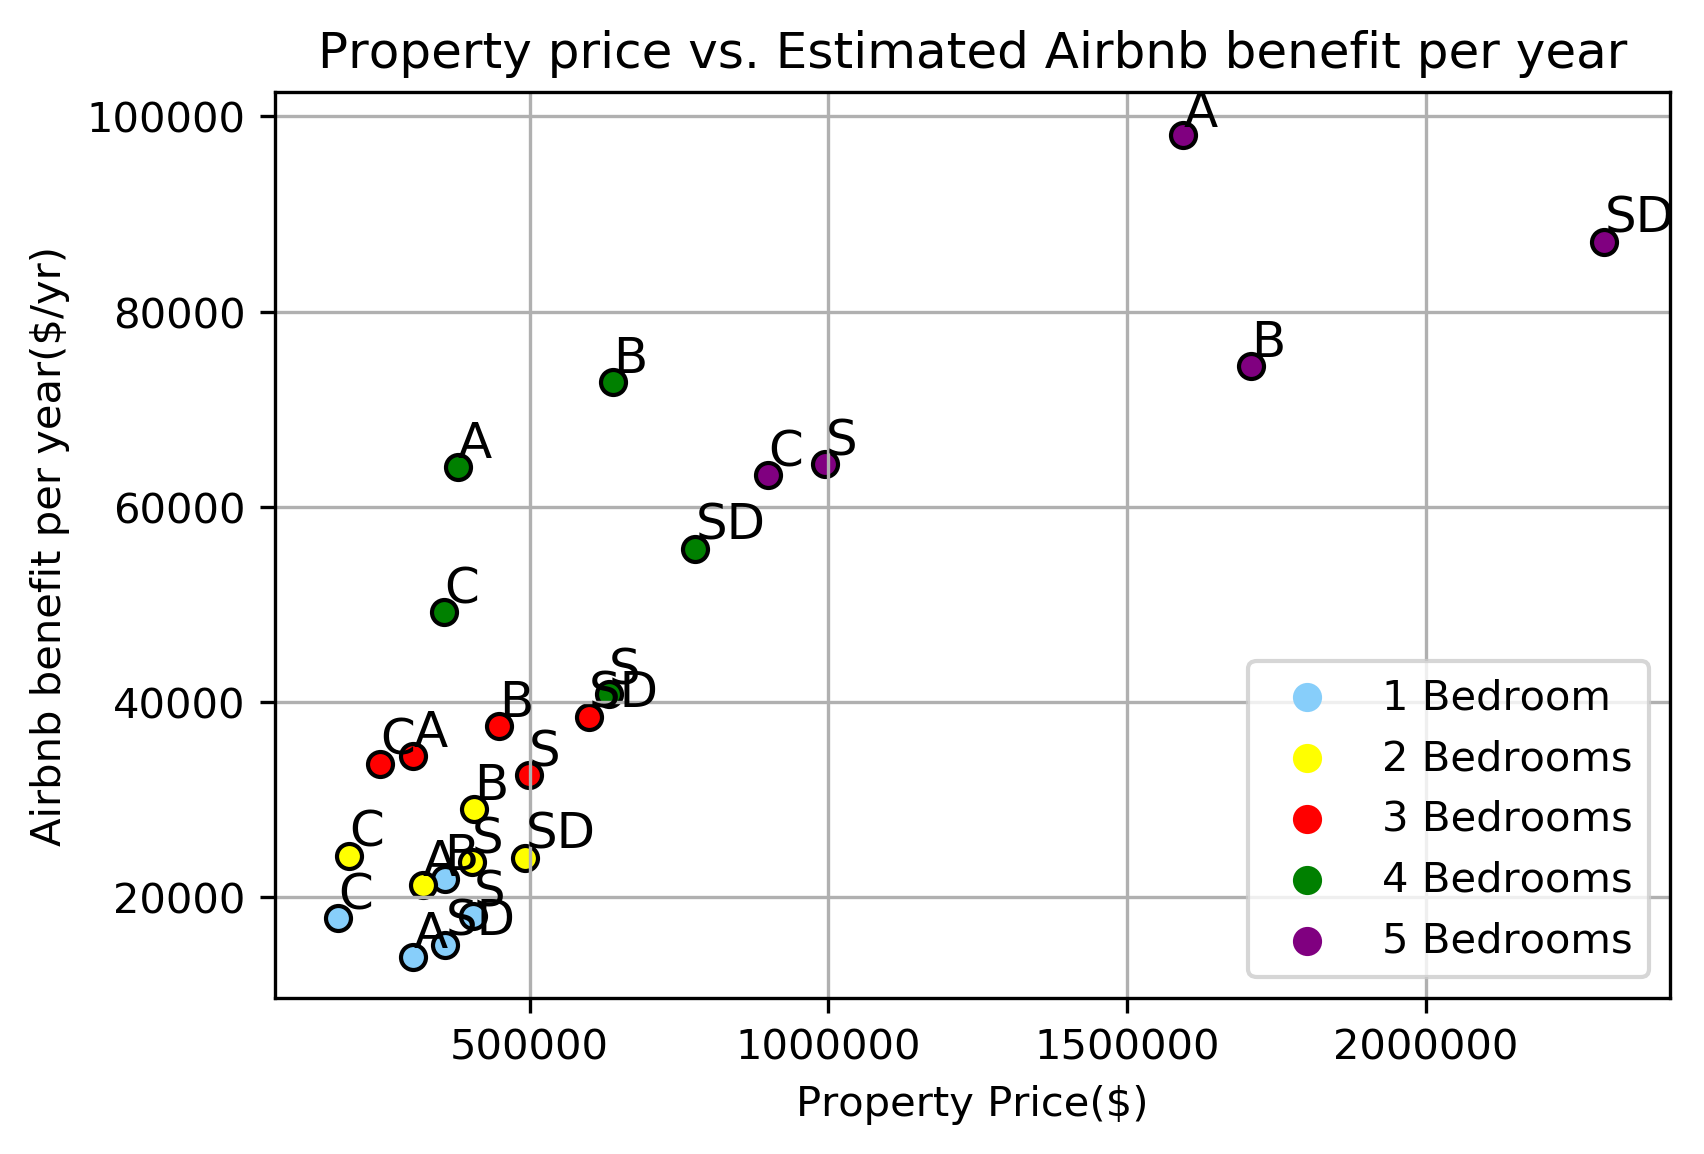

In [11]:
# Create a scatter plot with all bedroom, estimated income per year, median property price
city_name_s = ["A","B","C","SD", "S"]

bd1_x_axis = bd1_df["MedianListingPrice "].values
bd1_y_axis = city_bd1_income

bd2_x_axis = bd2_df["MedianListingPrice "].values
bd2_y_axis = city_bd2_income

bd3_x_axis = bd3_df["MedianListingPrice "].values
bd3_y_axis = city_bd3_income

bd4_x_axis = bd4_df["MedianListingPrice "].values
bd4_y_axis = city_bd4_income

bd5_x_axis = bd5_df["MedianListingPrice "].values
bd5_y_axis = city_bd5_income

plt.figure(dpi=300)
color = ["lightskyblue","yellow","red","green","purple"]

for i,city in enumerate(city_name_s):
    
    x = bd1_x_axis[i]
    y = bd1_y_axis[i]
    plt.scatter(x, y, marker="o", facecolors="lightskyblue", edgecolors="black",alpha=1, label="1 Bedroom")
    plt.text(x, y + 1000, city, fontsize = 12)


for i,city in enumerate(city_name_s):
    
    x = bd2_x_axis[i]
    y = bd2_y_axis[i]
    plt.scatter(x, y, marker="o", facecolors="yellow", edgecolors="black",alpha=1, label="2 Bedroom")
    plt.text(x, y + 1000, city, fontsize = 12)
    

for i,city in enumerate(city_name_s):
    
    x = bd3_x_axis[i]
    y = bd3_y_axis[i]
    plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black",alpha=1, label="3 Bedroom")
    plt.text(x, y + 1000, city, fontsize = 12)
    

for i,city in enumerate(city_name_s):
    
    x = bd4_x_axis[i]
    y = bd4_y_axis[i]
    plt.scatter(x, y, marker="o", facecolors="green", edgecolors="black",alpha=1, label="4 Bedroom")
    plt.text(x, y + 1000, city, fontsize = 12)
    
    
for i,city in enumerate(city_name_s):
    
    x = bd5_x_axis[i]
    y = bd5_y_axis[i]
    plt.scatter(x, y, marker="o", facecolors="purple", edgecolors="black",alpha=1, label="5 Bedroom")
    plt.text(x, y + 1000, city, fontsize = 12)
    
plt.grid(True)
plt.title("Property price vs. Estimated Airbnb benefit per year")
plt.xlabel("Property Price($)")
plt.ylabel("Airbnb benefit per year($/yr)")

lgnd = plt.legend(("1 Bedroom", "2 Bedrooms", "3 Bedrooms", "4 Bedrooms","5 Bedrooms"))
lgnd.legendHandles[0].set_color("lightskyblue")
lgnd.legendHandles[1].set_color("yellow")
lgnd.legendHandles[2].set_color("red")
lgnd.legendHandles[3].set_color("green")
lgnd.legendHandles[4].set_color("purple")

plt.savefig("images/Property price vs. Estimated Airbnb benefit per year.png", bbox_inches="tight")
plt.show()

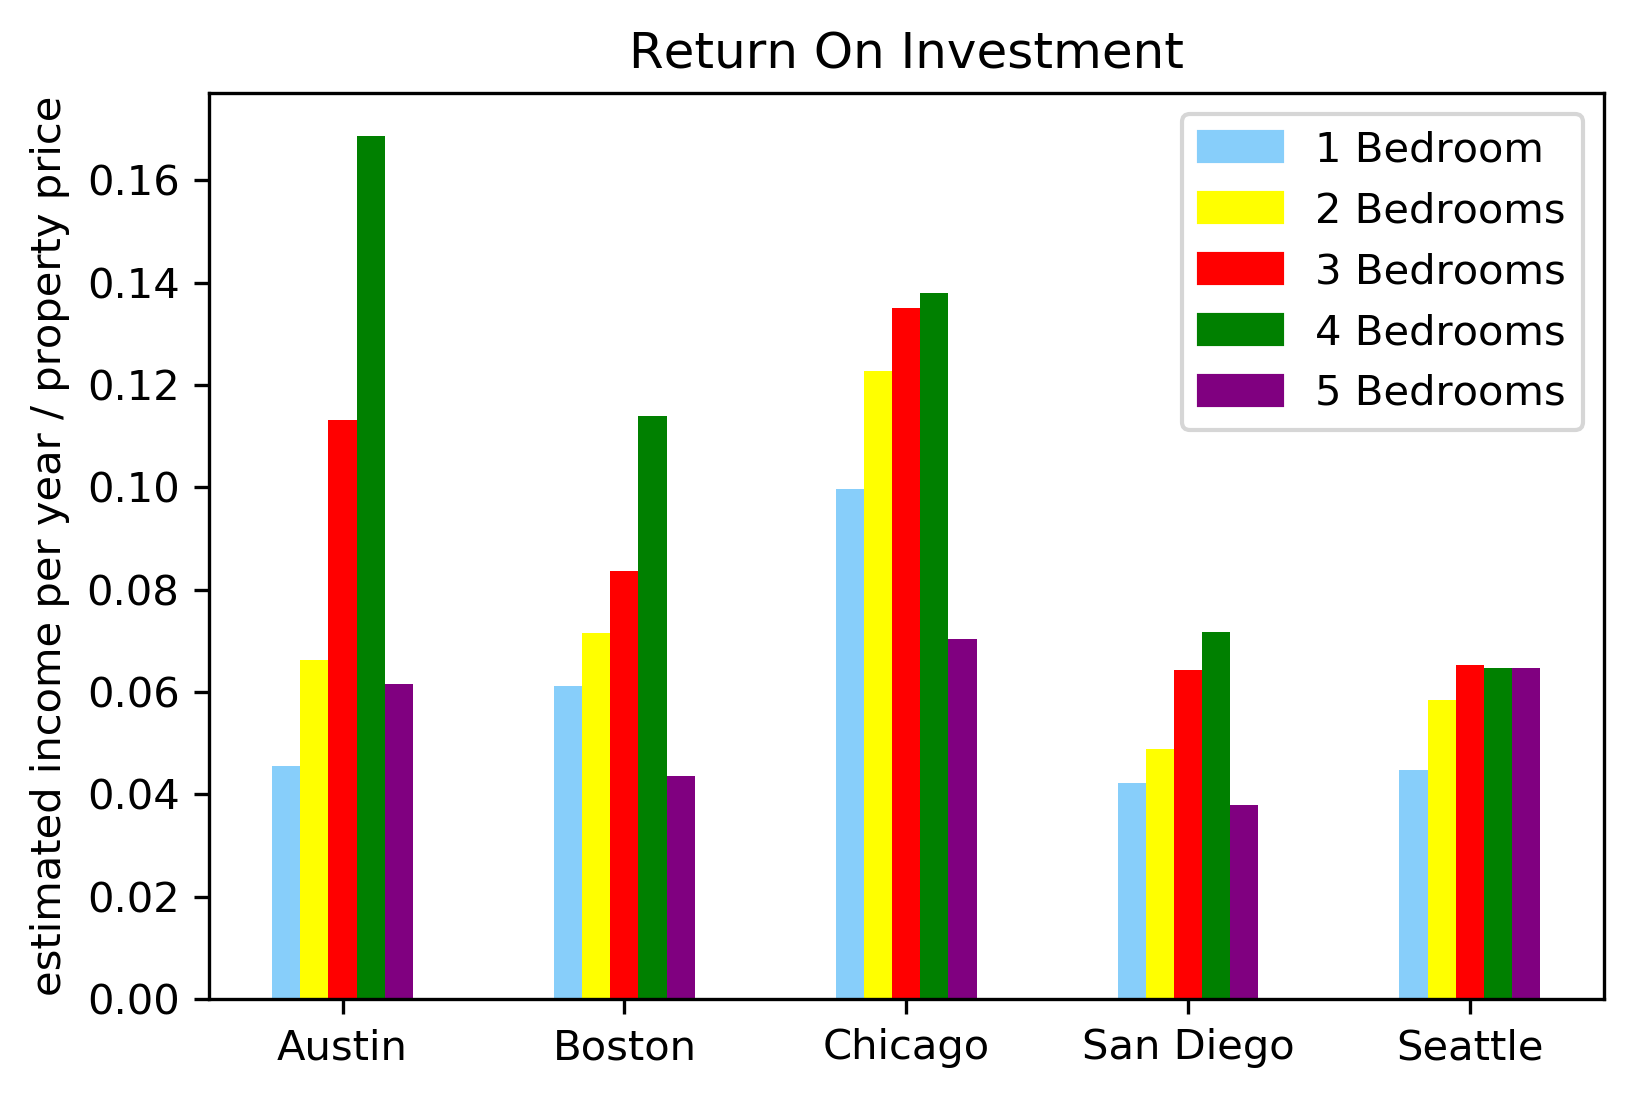

In [12]:
# Rate: possible airbnb income / property price
# if the rate is higher means that the city is more valuable to invest
rate1 = []
rate2 = []
rate3 = []
rate4 = []
rate5 = []
city_name = ["Austin", "Boston", "Chicago", "San Diego", "Seattle"]

num = 1
delta = 0.2
wid = 0.2
loc = [2,4,6,8,10]
plt.figure(dpi=300)

for i in range(len(bd1_x_axis)):
    
    x = bd1_x_axis[i]
    y = bd1_y_axis[i]
    rate1.append(y/x)
plt.bar(loc, rate1, wid, color="lightskyblue")

for j in range(len(loc)):
    loc[j] = loc[j] + delta

for i in range(len(bd2_x_axis)):
    
    x = bd2_x_axis[i]
    y = bd2_y_axis[i]
    rate2.append(y/x)
plt.bar(loc, rate2, wid, color="yellow")

for j in range(len(loc)):
    loc[j] = loc[j] + delta


for i in range(len(bd3_x_axis)):
    
    x = bd3_x_axis[i]
    y = bd3_y_axis[i]
    rate3.append(y/x)
plt.bar(loc, rate3, wid, color="red")
tick_locations = [value for value in loc]
plt.xticks(tick_locations, city_name)

for j in range(len(loc)):
    loc[j] = loc[j] + delta
    
for i in range(len(bd4_x_axis)):
    
    x = bd4_x_axis[i]
    y = bd4_y_axis[i]
    rate4.append(y/x)
plt.bar(loc, rate4, wid, color="green")

for j in range(len(loc)):
    loc[j] = loc[j] + delta

for i in range(len(bd5_x_axis)):
    
    x = bd5_x_axis[i]
    y = bd5_y_axis[i]
    rate5.append(y/x)
plt.bar(loc, rate5, wid, color="purple")

plt.title("Return On Investment")
plt.ylabel("estimated income per year / property price")

lgnd = plt.legend(("1 Bedroom", "2 Bedrooms", "3 Bedrooms", "4 Bedrooms","5 Bedrooms"))
lgnd.legendHandles[0].set_color("lightskyblue")
lgnd.legendHandles[1].set_color("yellow")
lgnd.legendHandles[2].set_color("red")
lgnd.legendHandles[3].set_color("green")
lgnd.legendHandles[4].set_color("purple")

plt.savefig("images/Return On Investment.png")
plt.show()

In [13]:
roi = {"City name" : city_name,
       "1 bd" : rate1,
       "2 bds" : rate2,
       "3 bds" : rate3,
       "4 bds" : rate4,
       "5 bds" : rate5 
      }
roi_df = pd.DataFrame(roi)
roi_df = roi_df.set_index("City name")
roi_df

,1 bd,2 bds,3 bds,4 bds,5 bds
City name,,,,,
Austin,0.045572,0.066201,0.113156,0.168651,0.061495
Boston,0.061237,0.071427,0.083600,0.113838,0.043609
Chicago,0.099591,0.122784,0.135011,0.137872,0.070382
San Diego,0.042237,0.048889,0.064302,0.071643,0.037922
Seattle,0.044702,0.058442,0.065190,0.064621,0.064691
